# TUGAS PRAKTIKUM M4
**Aura Najma Kustiananda** | 164221053

## Analisis Perbedaaan Preprocessing dengan 3 Metode

### NLTK

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
import re

text = "Her older brother had carved goodness and tenderness in himself with his own hands."
text_eng = re.sub(r'[^\w\s]', '', text.lower())

tokens_nltk = word_tokenize(text_eng)
stop_words = set(stopwords.words("english"))
filtered_nltk = [word for word in tokens_nltk if word not in stop_words]

stemmer = PorterStemmer()
stemmed_nltk = [stemmer.stem(word) for word in filtered_nltk]

print("Hasil Preprocessing dengan NLTK:")
print("Tokenized & Stopwords Removed:", filtered_nltk)
print("Stemming Result:", stemmed_nltk)

blob = TextBlob(text_eng)
tokens_blob = blob.words
stemmed_blob = [Word(word).stem() for word in tokens_blob]

print("\nHasil Preprocessing dengan TextBlob:")
print("Tokenized:", tokens_blob)
print("Stemming Result:", stemmed_blob)

Hasil Preprocessing dengan NLTK:
Tokenized & Stopwords Removed: ['older', 'brother', 'carved', 'goodness', 'tenderness', 'hands']
Stemming Result: ['older', 'brother', 'carv', 'good', 'tender', 'hand']

Hasil Preprocessing dengan TextBlob:
Tokenized: ['her', 'older', 'brother', 'had', 'carved', 'goodness', 'and', 'tenderness', 'in', 'himself', 'with', 'his', 'own', 'hands']
Stemming Result: ['her', 'older', 'brother', 'had', 'carv', 'good', 'and', 'tender', 'in', 'himself', 'with', 'hi', 'own', 'hand']


Terdapat sedikit perbedaan antara suatu kalimat yang dipreprocessing dan distemming dengan NLTK dan TextBlob. Hal ini dikarenakan TextBlob tidak memiliki stopwords, sehingga hasil stemmingnya masih memuat kata-kata yang kurang bermakna, seperti and, in, dan sebagainya.

In [22]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

teks = "Mas Dipta telah mengukir kebaikan dalam dirinya dengan tangannya sendiri."
teks_indo = re.sub(r'[^\w\s]', '', teks.lower())

# 2. Hapus stopwords
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Tokenisasi
tokens = teks_indo.split()
filtered_tokens = [word for word in tokens if word not in stop_words]

stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()
text_filtered = ' '.join(filtered_tokens)
stemmed_text = stemmer.stem(text_filtered)

print("Teks setelah pembersihan dan penghapusan stopwords:")
print(filtered_tokens)

print("\nHasil stemming:")
print(stemmed_text)


Teks setelah pembersihan dan penghapusan stopwords:
['mas', 'dipta', 'telah', 'mengukir', 'kebaikan', 'dalam', 'dirinya', 'dengan', 'tangannya', 'sendiri']

Hasil stemming:
mas dipta telah ukir baik dalam diri dengan tangan sendiri


## Impor Library Wikipedia

In [1]:
import wikipedia
wikipedia.set_lang("id")

## Crawling Data

In [33]:
list_topik = ["Aset", "Aset lancar", "Akrual", "Anuitas", "Aset takberwujud", "Akun", "Akuntansi biaya", "Akuntasi forensik", "Akuntansi manajemen", "Debit"]

Di atas merupakan 10 topik dari wikipedia yang akan dicrawling dan dilakukan analisis text mining

In [34]:
list_crawling = []

In [35]:
for i in range(len(list_topik)):
    topik = list_topik[i]
    halaman = wikipedia.page(topik)
    isi_wiki = halaman.content
    list_crawling.append(isi_wiki)
    print("Halaman", list_topik[i], "berhasil di-crawling")

Halaman Aset berhasil di-crawling
Halaman Aset lancar berhasil di-crawling
Halaman Akrual berhasil di-crawling
Halaman Anuitas berhasil di-crawling
Halaman Aset takberwujud berhasil di-crawling
Halaman Akun berhasil di-crawling
Halaman Akuntansi biaya berhasil di-crawling
Halaman Akuntasi forensik berhasil di-crawling
Halaman Akuntansi manajemen berhasil di-crawling
Halaman Debit berhasil di-crawling


10 halaman wikipedia telah berhasil di-crawling. Halaman-halaman ini disimpan dalam string dan digabungkan menjadi 1 list.

## Membersihkan Teks

In [37]:
import re
list_bersih = []
for i in range(len(list_crawling)):
    teks = list_crawling[i]
    teks_bersih = re.sub(r'[^\w\s]', '', teks.lower())
    list_bersih.append(teks_bersih)
    print("Teks ke", i, "sudah dibersihkan")



Teks ke 0 sudah dibersihkan
Teks ke 1 sudah dibersihkan
Teks ke 2 sudah dibersihkan
Teks ke 3 sudah dibersihkan
Teks ke 4 sudah dibersihkan
Teks ke 5 sudah dibersihkan
Teks ke 6 sudah dibersihkan
Teks ke 7 sudah dibersihkan
Teks ke 8 sudah dibersihkan
Teks ke 9 sudah dibersihkan


Teks-teks yang sudah di-crawling akan dibersihkan dari tanda baca, sehingga lebih mudah untuk melakukan stopwords dan stemming. Selain itu, teks juga diubah menjadi lowercase.

## Stopwords dan Stemming

In [8]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

list_bersih_stop = []
factory = StopWordRemoverFactory()
stop_word = factory.create_stop_word_remover()

list_stopwords = []
for i in range(len(list_crawling)):
    teks = list_bersih[i]
    teks_bersih_stop = stop_word.remove(teks)
    list_bersih_stop.append(teks_bersih_stop)
    print("Teks ke", i, "sudah dibersihkan dan stop words dihapus")


Berita ke 0 sudah dibersihkan dan stop words dihapus
Berita ke 1 sudah dibersihkan dan stop words dihapus
Berita ke 2 sudah dibersihkan dan stop words dihapus
Berita ke 3 sudah dibersihkan dan stop words dihapus
Berita ke 4 sudah dibersihkan dan stop words dihapus
Berita ke 5 sudah dibersihkan dan stop words dihapus
Berita ke 6 sudah dibersihkan dan stop words dihapus
Berita ke 7 sudah dibersihkan dan stop words dihapus
Berita ke 8 sudah dibersihkan dan stop words dihapus
Berita ke 9 sudah dibersihkan dan stop words dihapus


Setiap teks dibersihkan dari kata yang kurang bermakna menggunakan stopwords dari library Sastrawi.

In [39]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

list_bersih_stem = []

for i in range(len(list_crawling)):
    teks = list_bersih_stop[i]
    teks_stem = stemmer.stem(teks)
    list_bersih_stem.append(teks_stem)
    print("Teks ke", i, "sudah di-stem")


Teks ke 0 sudah di-stem
Teks ke 1 sudah di-stem
Teks ke 2 sudah di-stem
Teks ke 3 sudah di-stem
Teks ke 4 sudah di-stem
Teks ke 5 sudah di-stem
Teks ke 6 sudah di-stem
Teks ke 7 sudah di-stem
Teks ke 8 sudah di-stem
Teks ke 9 sudah di-stem


Kata-kata yang memiliki imbuhan atau akhiran telah diubah ke bentuk dasarnya dengan memanfaatkan stemming dari library Sastrawi.

## Analisis

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

docs_clear = list_bersih_stem
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)


(10, 458)


In [42]:
print(X)

  (0, 34)	0.011782654547099924
  (0, 45)	0.010308430407449146
  (0, 373)	0.011782654547099924
  (0, 149)	0.010308430407449146
  (0, 133)	0.011782654547099924
  (0, 368)	0.010308430407449146
  (0, 105)	0.011782654547099924
  (0, 444)	0.01845847787388567
  (0, 43)	0.008230628182705518
  (0, 457)	0.02702561617221896
  (0, 22)	0.011782654547099924
  (0, 16)	0.0074406844388769456
  (0, 308)	0.01230565191592378
  (0, 220)	0.0074406844388769456
  (0, 63)	0.008230628182705518
  (0, 118)	0.008230628182705518
  (0, 416)	0.0074406844388769456
  (0, 135)	0.011782654547099924
  (0, 165)	0.0074406844388769456
  (0, 120)	0.008230628182705518
  (0, 169)	0.010308430407449146
  (0, 170)	0.00675640404305474
  (0, 189)	0.008230628182705518
  (0, 310)	0.010308430407449146
  (0, 372)	0.03092529122234744
  :	:
  (9, 166)	0.012454082056699844
  (9, 64)	0.10111027680593049
  (9, 171)	0.030509159813669428
  (9, 73)	0.03672467975857781
  (9, 112)	0.640450470680487
  (9, 344)	0.02801592408585388
  (9, 19)	0.01245

Sebelum melakukan clustering, kita harus merepresentaskan vektor dengan VSM-TFIDF. Dengan parameter max_df = 0.95 dan min_df = 2, artinya kita mengabaikan kata yang terlalu banyak muncul (>95%) dan kata yang terlalu sedikit muncul (muncul di kurang dari 2 teks). X di sini merepresentasikan nilai TF-IDF untuk setiap kata pada teks tertentu

In [48]:
dbscan = cluster.DBSCAN(eps=0.7, min_samples=1, metric='cosine')
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
print(C_db)


[0 0 1 2 0 1 3 3 3 4]


Selanjutnya, clustering menggunakan DBSCAN dilakukan untuk TF-IDF yang kita miliki. eps = 0.7 menandakan dalam clustering kali ini, nilai maksimal antara 2 titik sehingga dia dapat dibilang "bertetangga" adalah 0.7. Nilai dari min_samples = 1 memungkinkan 1 titik saja sudah bisa membentuk cluster sendiri. Sementara itu, metric = "cosine" digunakan untuk mengukur jarak antara kedua titik, karena metric tersebut lebih cocok untuk teks dibandingkan euclidean distance

In [50]:
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
C = [C_db]

for res in C:
    print(siluet(X, res))


0.12581900610372201


Silhouette coefficient merupakan ukuran untuk menghitung kemiripan titik dengan kluster tempat titik tersebut dibanding kluste rtetangga. Nilai silhouette coefficient sebesar 0.1258 merupakan nilai yang cukup rendah. Artinya, cluster yang terbentuk tidak benar-benar terpisah dengan baik, dan titik-titiknya cukup ambigu

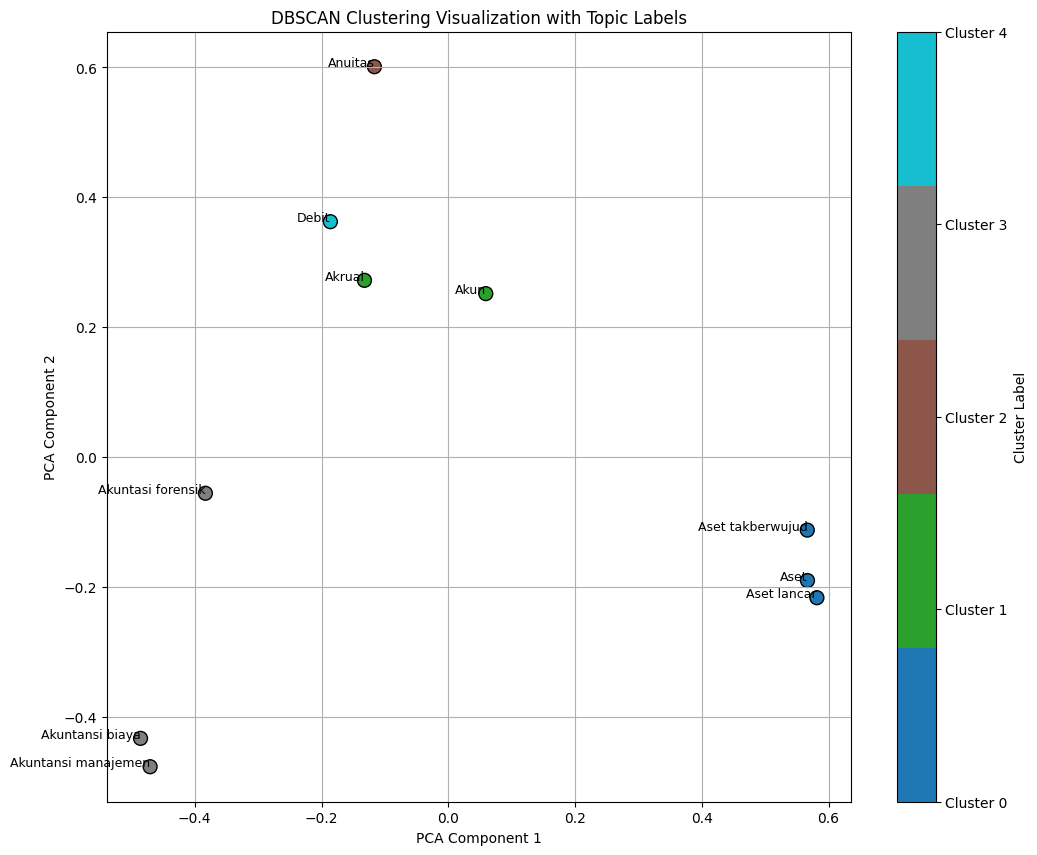

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

unique_clusters = set(C_db)
colors = plt.get_cmap('tab10', len(unique_clusters))

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=C_db, cmap=colors, marker='o', edgecolor='k', s = 100)

for i, txt in enumerate(list_topik):
    plt.text(X_reduced[i, 0], X_reduced[i, 1], txt, fontsize=9, ha='right')

cbar = plt.colorbar(scatter, label='Cluster Label')
cbar.set_ticks(list(unique_clusters))  
cbar.set_ticklabels([f'Cluster {i}' for i in unique_clusters])  

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization with Topic Labels')
plt.grid(True)
plt.show()


Dari cluster di atas, dapat dilihat cluster 0 berisi teks untuk Aset takberwujud, Aset, dan Aset lancar. Hal ini masuk akal karena ketiganya sama-sama membahas mengenai jenis-jenis set. Cluster 1 berisi Akrual dan Akun. Akun sendiri adalah media akuntansi untuk mencatat transaksi keuangan, dan Akrual adalah suatu metode akuntansi di mana penerimaan dan pengeluaran diakui atau dicatat ketika transaksi terjadi. Maka, masuk akal bahwa kedua teks ini menjadi satu kluster. Cluster 3 berisi teks Akuntansi forensik, Akuntansi biaya, dan Akuntansi manajemen, di mana ketiga teks ini membahas mengenai jenis-jenis Akuntansi. Cluster 2 dan 4 masing-masing diisi oleh teks Anuitas dan Debit, di mana teks tersebut membahas hal-hal yang cukup berbeda dengan teks-teks lain

## Visualisasi

In [29]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster
from collections import Counter
import numpy as np

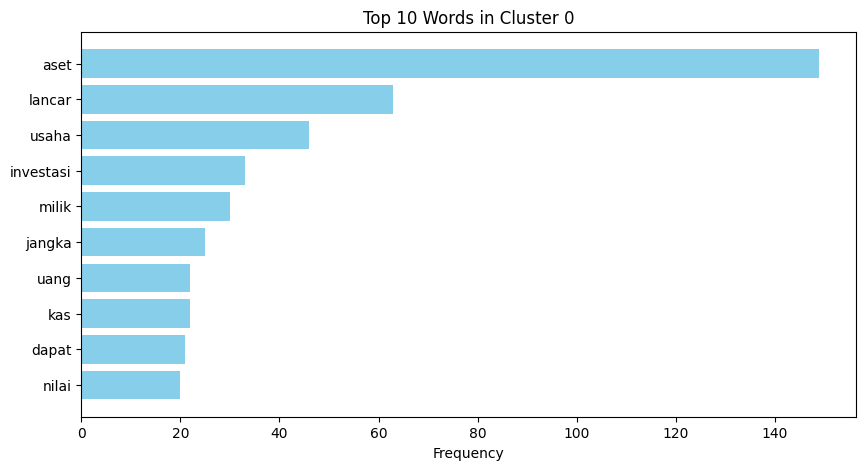

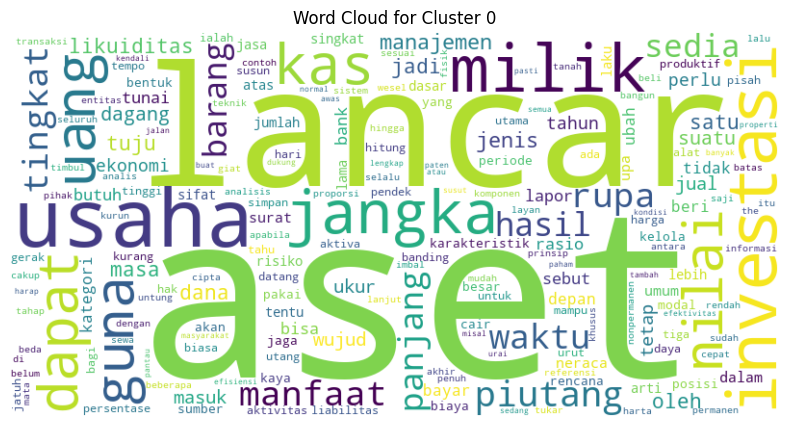

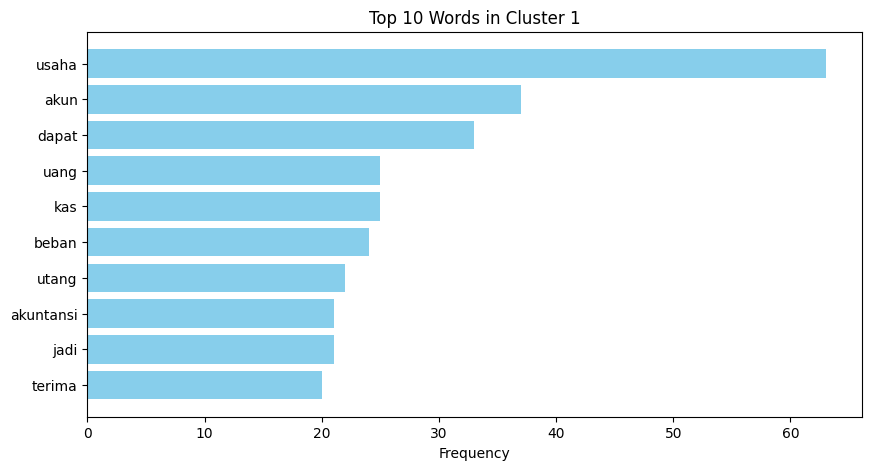

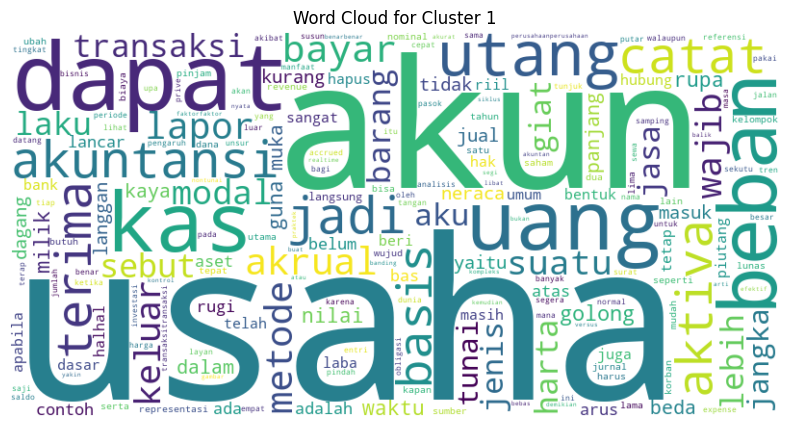

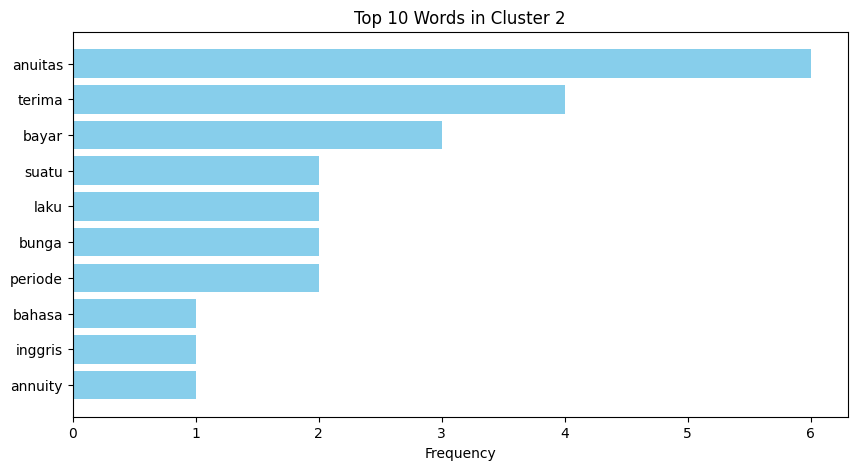

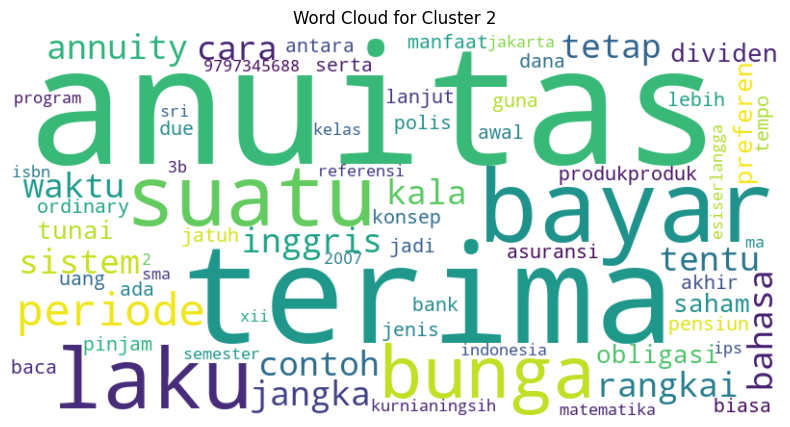

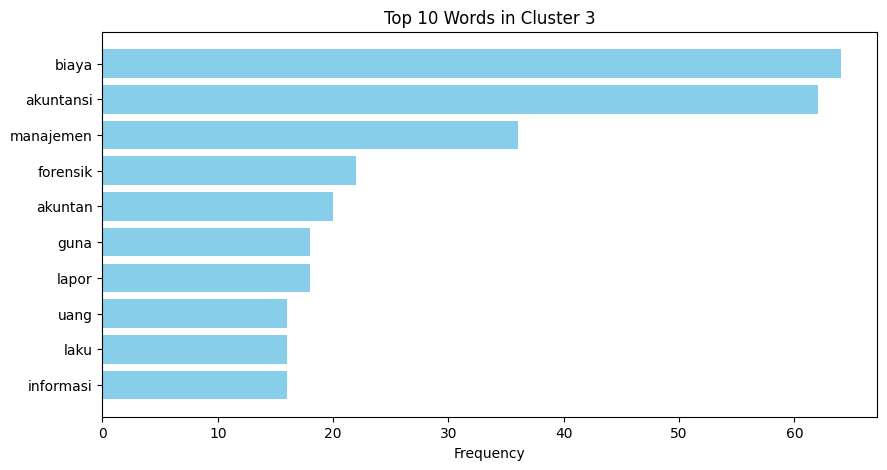

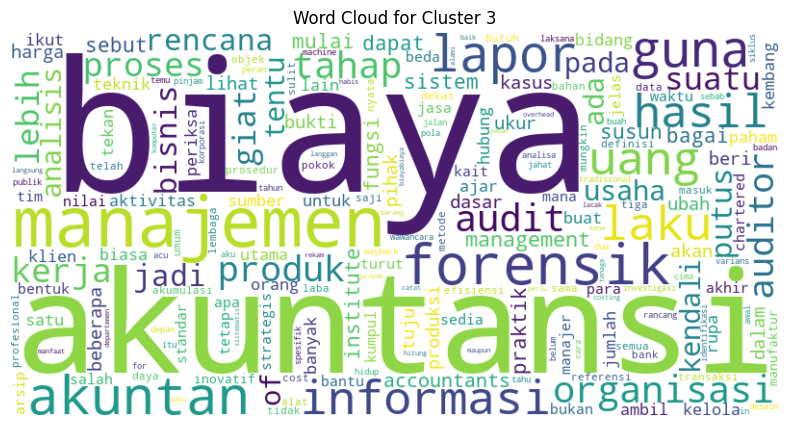

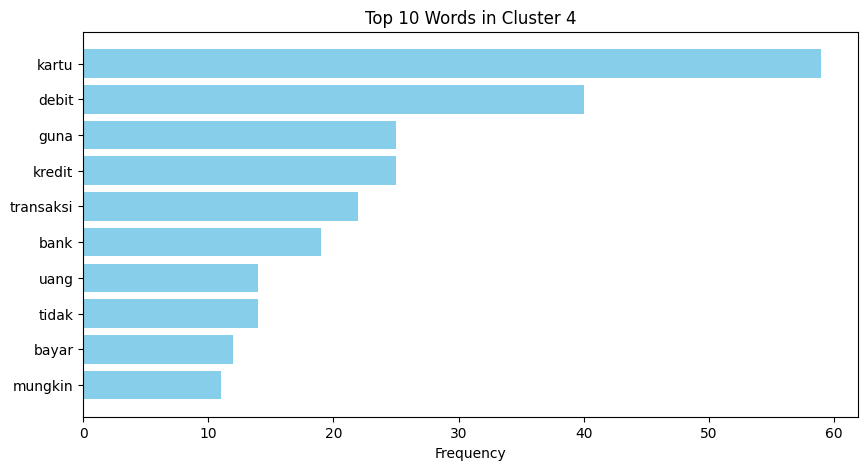

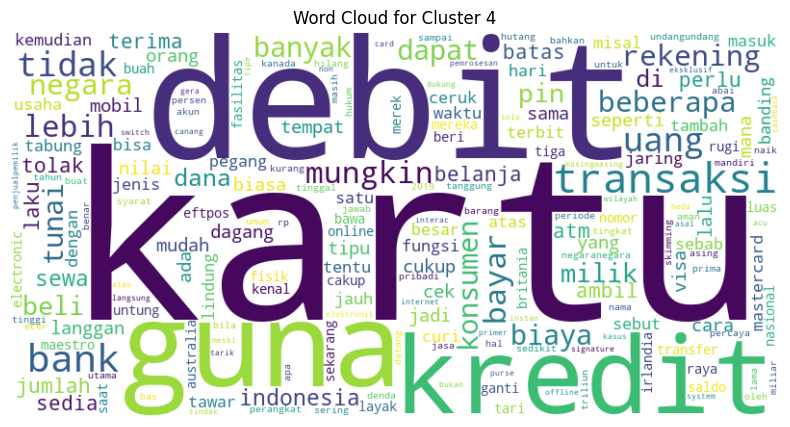

In [54]:
unique_clusters = set(C_db)
wordclouds = {}
top_words_per_cluster = {}

for cluster_id in unique_clusters:
    cluster_texts = [docs_clear[i] for i in range(len(docs_clear)) if C_db[i] == cluster_id]
    cluster_text = ' '.join(cluster_texts)
    word_freq = Counter(cluster_text.split())
    most_common_words = word_freq.most_common(10)
    top_words_per_cluster[cluster_id] = most_common_words
    
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 5))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top 10 Words in Cluster {cluster_id}')
    plt.gca().invert_yaxis()
    plt.show()
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    wordclouds[cluster_id] = wordcloud

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_id}')
    plt.show()

**INTERPRETASI WORDCLOUD**
1. Cluster 0 mengacu pada aset, utang, dan investasi jangka panjang/pendek.
2. Cluster 1 lebih pada pencatatan transaksi dan kewajiban keuangan.
3. Cluster 2 berfokus pada konsep anuitas, bunga, dan pembayaran keuangan.
4. Cluster 3 terkait dengan manajemen biaya, akuntansi forensik, dan audit.
5. Cluster 4 memiliki tema kartu debit dan transaksinya